# Forecast Evaluations

### Classic Train/Test Split

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [183]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [185]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [186]:
df.columns = ['ds','y']

In [187]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [188]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


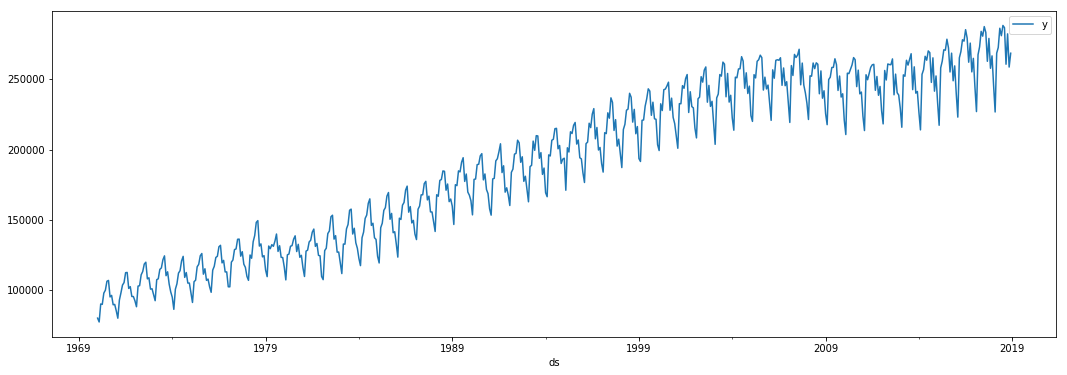

In [189]:
df.plot(x='ds',y='y',figsize=(18,6))

In [190]:
len(df)

588

In [191]:
len(df) - 12

576

In [192]:
train = df.iloc[:576]
test = df.iloc[576:]

In [193]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [194]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263348.877048,274069.034629,285530.763538,263272.182929,263408.698329,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,16448.763644,0.0,0.0,0.0,279797.640692
584,2018-09-01,263489.606772,255853.724067,267198.537533,263369.019000,263577.835001,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,-1669.492450,0.0,0.0,0.0,261820.114321
585,2018-10-01,263625.796827,263247.354895,274539.143701,263477.532695,263745.882773,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,5307.799177,0.0,0.0,0.0,268933.596004
586,2018-11-01,263766.526551,250087.267929,261329.148126,263586.328108,263936.075269,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,-8206.692440,0.0,0.0,0.0,255559.834111
587,2018-12-01,263902.716607,251026.012016,262766.066957,263680.350517,264106.895858,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,-6920.633214,0.0,0.0,0.0,256982.083393


In [195]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


[Info on ax= parameter](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)

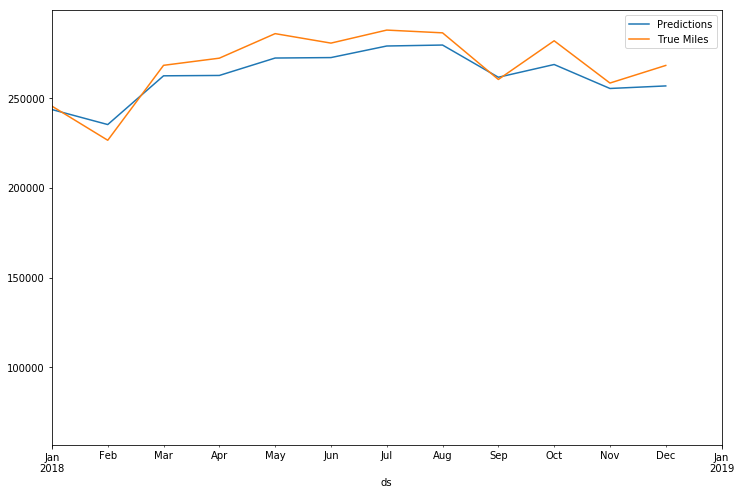

In [196]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [197]:
from statsmodels.tools.eval_measures import rmse

In [198]:
predictions = forecast.iloc[-12:]['yhat']

In [199]:
predictions

576    243796.609534
577    235426.627562
578    262627.330849
579    262828.742010
580    272552.156586
581    272803.877580
582    279261.432668
583    279797.640692
584    261820.114321
585    268933.596004
586    255559.834111
587    256982.083393
Name: yhat, dtype: float64

In [200]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [201]:
rmse(predictions,test['y'])

8661.095901709492

In [202]:
test.mean()

y    268739.666667
dtype: float64

# Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [204]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [205]:
len(df)

588

In [206]:
len(df)/12

49.0

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

In [207]:
# help(pd.Timedelta)

In [162]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [210]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [213]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108545.172580,107099.748151,110016.346952,102445.0,1976-12-11
1,1977-02-01,103082.245846,101525.992338,104689.450272,102416.0,1976-12-11
2,1977-03-01,118966.635618,117449.707291,120459.804913,119960.0,1976-12-11
3,1977-04-01,120606.270683,119041.821340,122263.557564,121513.0,1976-12-11
4,1977-05-01,127889.386836,126347.199524,129456.699558,128884.0,1976-12-11


In [214]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273254.523501,267202.320371,279511.599691,283184.0,2016-12-01
104,2017-09-01,255372.720203,249330.743827,261084.844672,262673.0,2016-12-01
105,2017-10-01,262476.518564,256769.520993,268001.419001,278937.0,2016-12-01
106,2017-11-01,249126.648938,243459.338900,254747.159187,257712.0,2016-12-01
107,2017-12-01,250371.688410,244625.193390,256090.260107,266535.0,2016-12-01


In [215]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
1,52 days,2.484109e+07,4984.083210,4590.014835,0.028137,0.3
13,53 days,2.226842e+07,4718.943023,4318.899977,0.025335,0.3
25,54 days,1.882583e+07,4338.874820,3803.991852,0.020509,0.4
37,55 days,2.374039e+07,4872.411127,4319.472747,0.023528,0.3
49,57 days,2.150039e+07,4636.851520,4050.449106,0.021775,0.4
61,58 days,2.377014e+07,4875.463292,4327.071181,0.022979,0.3
73,59 days,3.857268e+07,6210.691064,5144.794773,0.026666,0.3
85,60 days,3.959640e+07,6292.566974,5229.654576,0.027225,0.3
97,62 days,3.773627e+07,6142.985167,4985.238970,0.026153,0.4
2,80 days,3.264865e+07,5713.899872,4364.416238,0.024037,0.5


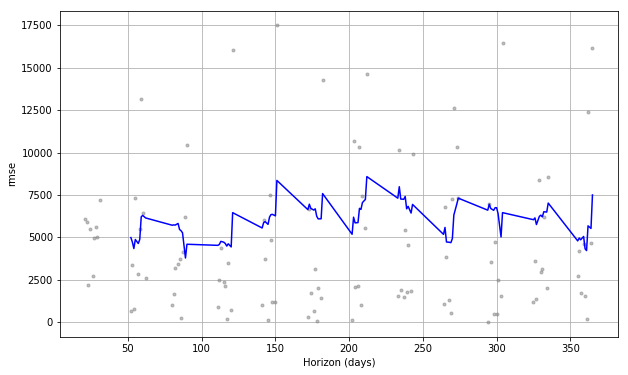

In [217]:
plot_cross_validation_metric(df_cv, metric='rmse');

MAPE is Mean Absolute Percentage Error

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

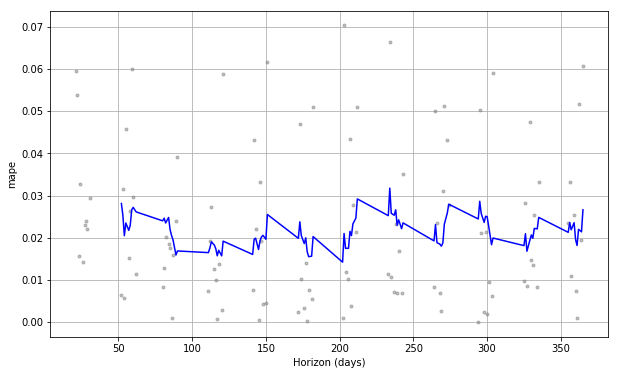

In [218]:
plot_cross_validation_metric(df_cv, metric='mape');